# Data mining

- kaggle (https://www.kaggle.com/datasets?fileType=csv)
- twitter 
- other sourses

In [18]:
import requests
from bs4 import BeautifulSoup

# Make a GET request to the URL
url = "https://www.foxnews.com/world"
#url = "https://www.foxnews.com/category/world/conflicts/ukraine"
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # parse the HTML content of the page
    soup = BeautifulSoup(response.content, "html.parser")
    
    # Find all the articles on the page
    articles = soup.find_all("article")
    
else:
    print("Failed to fetch the page")


In [10]:
articles[3]

<article class="article"><div class="m"><a href="/media/boris-johnson-west-give-ukraine-all-need-as-fast-possible"><img alt="Boris Johnson: The West must give Ukraine all they need 'as fast as possible'" src="https://a57.foxnews.com/static.foxnews.com/foxnews.com/content/uploads/2022/09/348/196/Boris-Johnson-resigns.jpg?ve=1&amp;tl=1"/></a> <!-- --></div> <div class="info"><header class="info-header"><div class="meta"><!-- --> <div><span class="eyebrow"><a href="https://www.foxnews.com/category/media/fox-news-flash">Fox News Flash</a></span> <span class="time">10 hours ago</span></div></div> <h4 class="title"><a href="/media/boris-johnson-west-give-ukraine-all-need-as-fast-possible">Boris Johnson: The West must give Ukraine all they need 'as fast as possible'</a></h4></header> <div class="content"><!-- --> <p class="dek"><a href="/media/boris-johnson-west-give-ukraine-all-need-as-fast-possible">Boris Johnson, the former prime minister of the United Kingdom, joined 'Special Report' foll

In [20]:
for article in articles:
    #print(article)
    # Extract the title and link of the article
    #try:
        
    
    title = article.find("h2").text
    link = article.find("a")["href"]

    # Print the title and link
    print(title)
    print(link)

Iranian couple faces 10-year jail sentence for dancing in the streets
/world/iranian-couple-faces-10-year-jail-sentence-dancing-streets
Texas man allegedly murdered DJ girlfriend in Colombia, stuffed body in suitcase and tossed in dumpster
/world/texas-man-allegedly-murdered-dj-girlfriend-colombia-stuffed-body-suitcase-tossed-dumpster
US Coast Guard seizes $33 million of hashish and meth in Gulf of Oman
/world/us-coast-guard-seizes-33-million-hashish-meth-gulf-oman


AttributeError: 'NoneType' object has no attribute 'text'

In [210]:
import twint
import pandas as pd
import nest_asyncio
nest_asyncio.apply()
config = twint.Config()

In [211]:
#config.Username = "elonmusk"
#config.Search = "tesla"
config.Limit = 200
config.Pandas = True
#config.User_full = True
config.Search ='#Leopards OR #Ukraine OR Leopards OR Ukraine'
config.Since = '2023-01-24 00:00:00'
config.Until = '2023-01-26 00:00:00'

In [ ]:
twint.run.Search(config)
tw_df = twint.storage.panda.Tweets_df

In [213]:
tw_df['tweet']

0      @Lee_Rueland @martinklin Das ist vielleicht ei...
1      @Lenodzavole @tumcarayol They should be fighti...
2      @reshetz When they can’t say that Crimea is Uk...
3      #UkraineFrontLines #Ukraine #RussiaIsATerroris...
4      Russia cannot afford to lose this fight. They ...
                             ...                        
214    Pathetic Australian open policy, security guar...
215    @ChakhoyanAndrew as to her history and collect...
216    @moravian63 @EddieK_1987 @mikepompeo Go to Ukr...
217    The Ukraine war starts to undermine Israeli se...
218      @TPostMillennial Ukraine is not winning. Loser!
Name: tweet, Length: 219, dtype: object

In [ ]:
!pip install rfc3339
!pip install iso8601
!pip install snorkel
import requests
import os
import json
from datetime import datetime
import rfc3339 
import iso8601   
import pandas as pd
import time

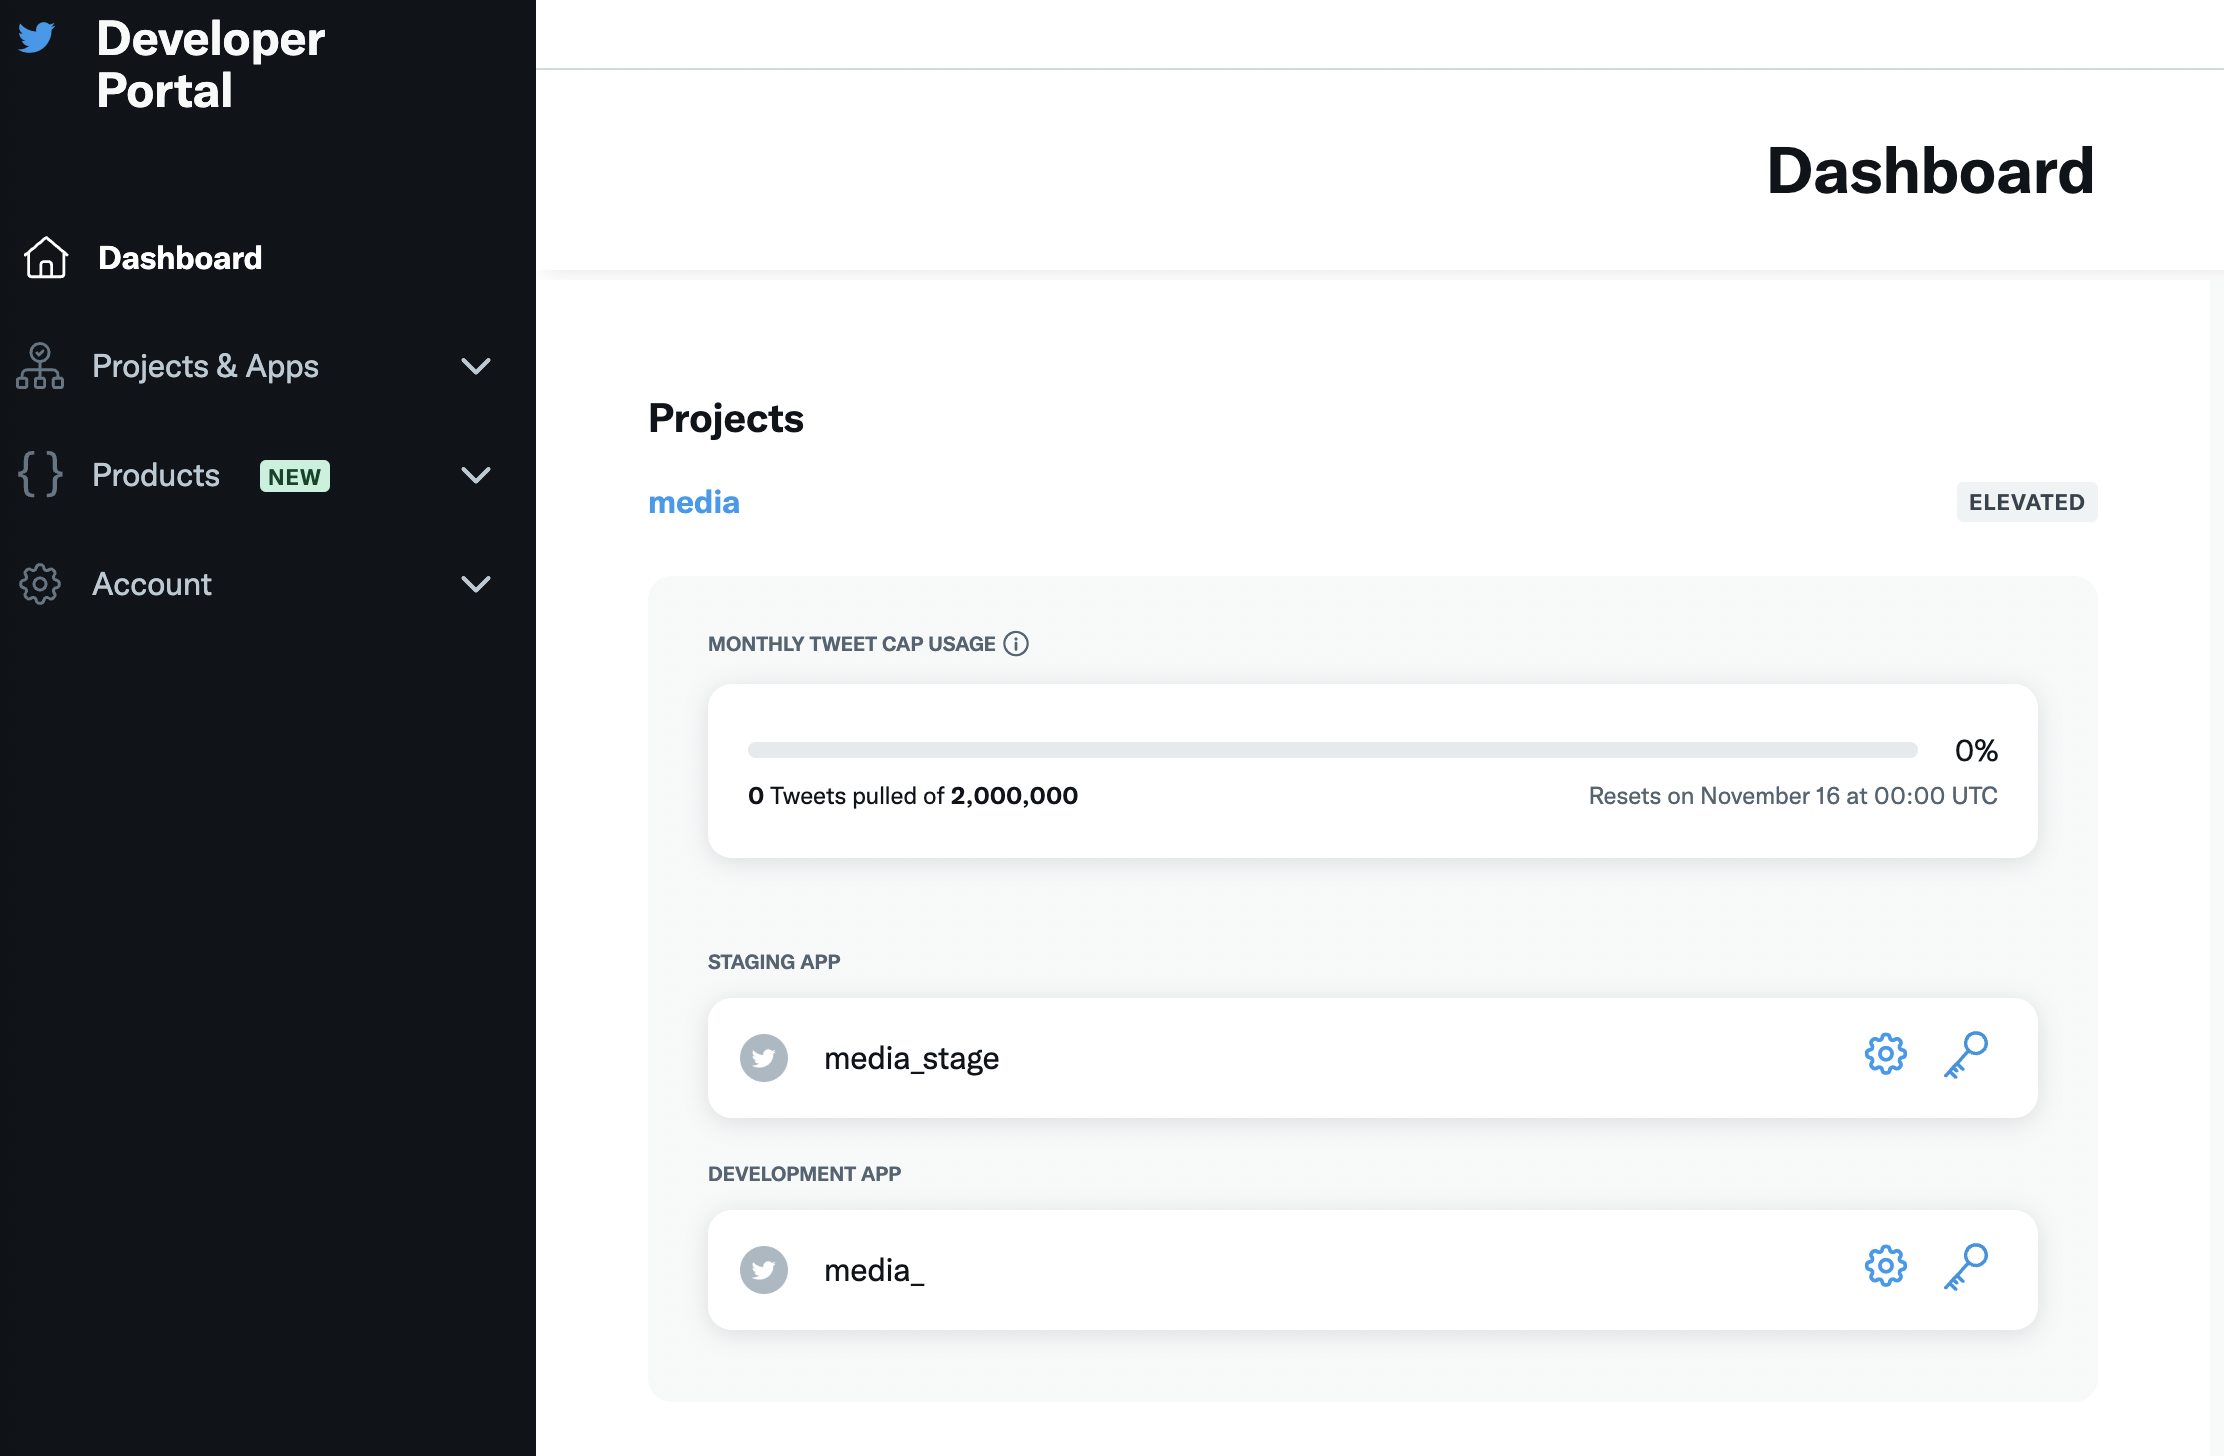

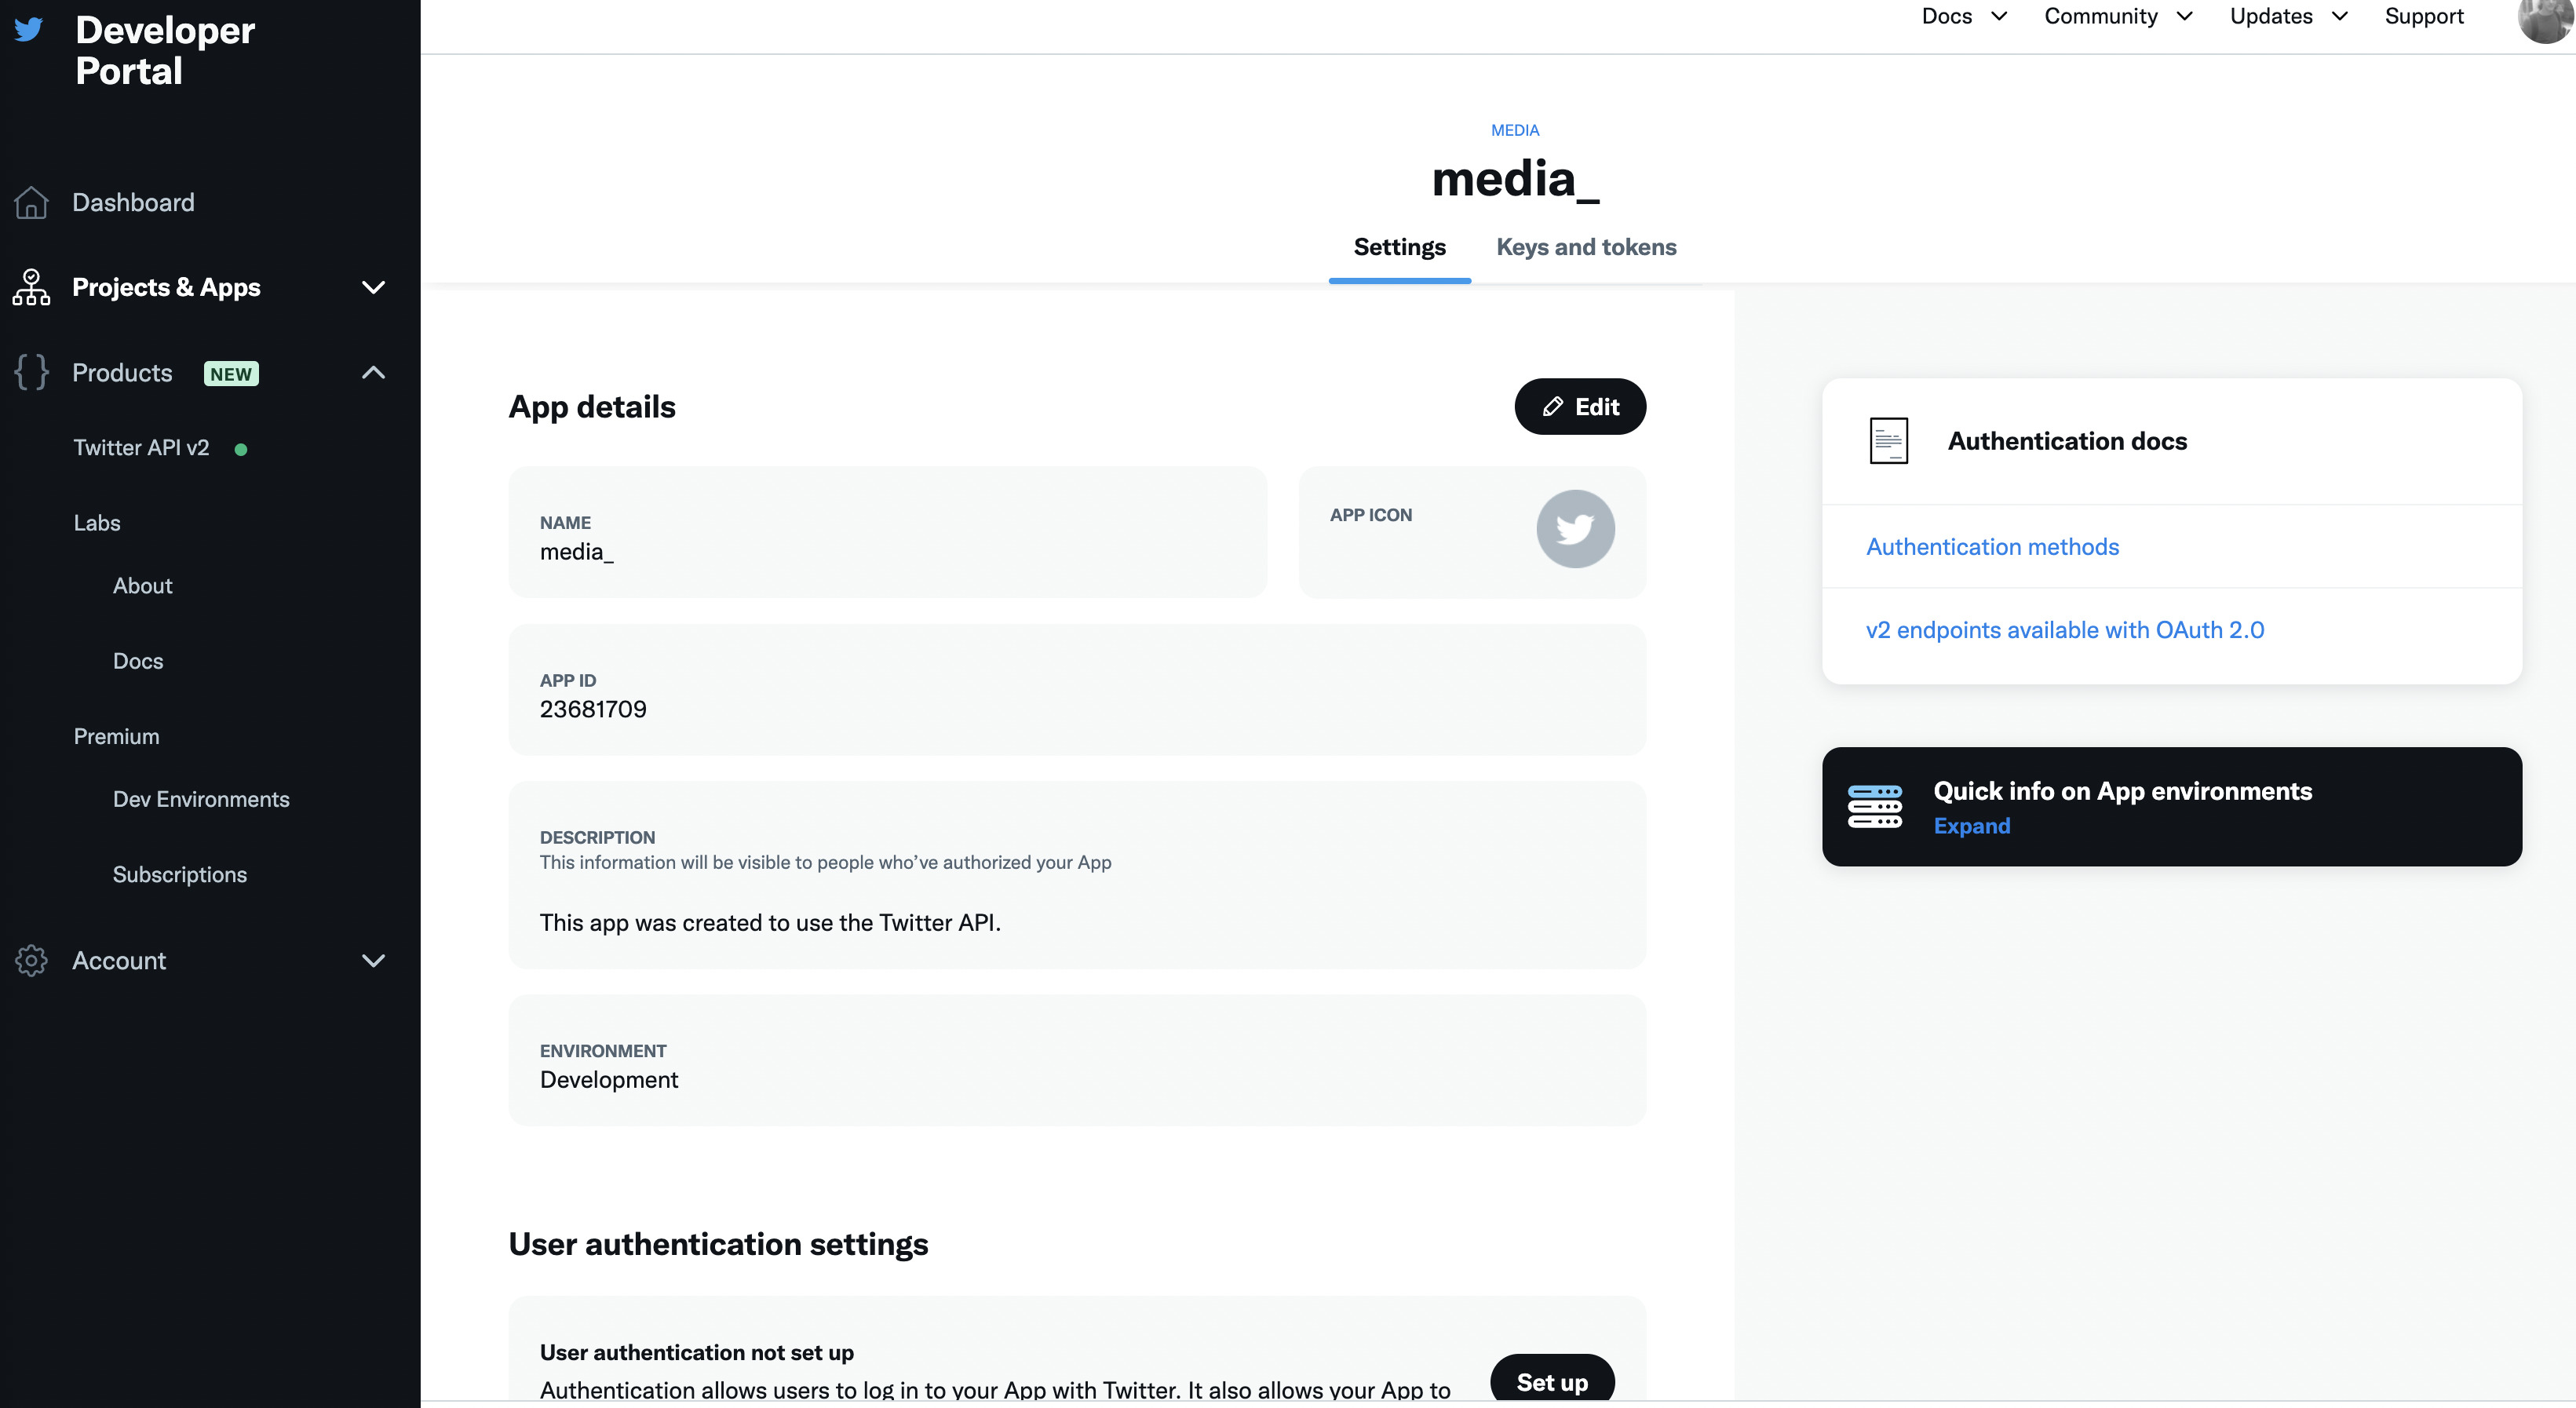

In [215]:
bearer_token = "AAAAAAAAAAAAAAAAAAAAAK1aaQEAAAAA3NG9m03A1eZTLOGPhDoyudMu4F8%3Dm441yoYSuqq5YRVDArXcQRum0CCJbZDFcX7GfbDN57P66ovZis"

def create_url(user_id):
    #user_id = 22390494
    return "https://api.twitter.com/2/users/{}/tweets".format(user_id)

def get_params():
    return {"tweet.fields": "created_at", "max_results":100,
            "start_time":rfc3339.rfc3339(iso8601.parse_date(d+'T00:00:00')),
           "end_time":rfc3339.rfc3339(iso8601.parse_date(d+'T23:59:59'))
           }

def bearer_oauth(r):
    """
    Method required by bearer token authentication.
    """

    r.headers["Authorization"] = f"Bearer {bearer_token}"
    r.headers["User-Agent"] = "v2UserTweetsPython"
    return r

def connect_to_endpoint(url, params):
    response = requests.request("GET", url, auth=bearer_oauth, params=params)
    print(response.status_code)
    if response.status_code != 200:
        raise Exception(
            "Request returned an error: {} {}".format(
                response.status_code, response.text
            )
        )
    return response.json()


In [216]:
id_list = [2097571,
           807095,
           2467791,
           742143,
           6107422,
           788524,
           3108351]
name_list = ["cnn",
             "nyt",
             "wp",
             "bbc",
             "ft",
    "dailymail",
             "WSJ"]

d = "2023-01-25"
twitter_df = pd.DataFrame() 
print(d)
for i in range(0,len(id_list)):
    try:
        url = create_url(id_list[i])
        params = get_params()
        json_response = connect_to_endpoint(url, params)
        print(name_list[i])
        df = pd.DataFrame(json_response['data'])
        df["media"] = name_list[i]
        if twitter_df.empty:
            twitter_df = df
        else:
            twitter_df.append(df, ignore_index=True)
    except KeyError:
        print(name_list[i])
        print("error")

2023-01-25
200
cnn
200
nyt


/var/folders/s9/dgp650sd0257_t8577rl9_f80000gn/T/ipykernel_9465/1438971645.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  twitter_df.append(df, ignore_index=True)


200
wp


/var/folders/s9/dgp650sd0257_t8577rl9_f80000gn/T/ipykernel_9465/1438971645.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  twitter_df.append(df, ignore_index=True)


200
bbc


/var/folders/s9/dgp650sd0257_t8577rl9_f80000gn/T/ipykernel_9465/1438971645.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  twitter_df.append(df, ignore_index=True)


200
ft


/var/folders/s9/dgp650sd0257_t8577rl9_f80000gn/T/ipykernel_9465/1438971645.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  twitter_df.append(df, ignore_index=True)


200
dailymail


/var/folders/s9/dgp650sd0257_t8577rl9_f80000gn/T/ipykernel_9465/1438971645.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  twitter_df.append(df, ignore_index=True)


200
WSJ


/var/folders/s9/dgp650sd0257_t8577rl9_f80000gn/T/ipykernel_9465/1438971645.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  twitter_df.append(df, ignore_index=True)


In [217]:
twitter_df.head()

,id,text,created_at,edit_history_tweet_ids,media
0,1618395046079877121,"A dog named Ralphie has been described as a ""f...",2023-01-25T23:47:01.000Z,[1618395046079877121],cnn
1,1618391055161872384,She inspired other pilots of color to earn the...,2023-01-25T23:31:10.000Z,[1618391055161872384],cnn
2,1618387328103325696,A Holocaust survivor was swindled out of his l...,2023-01-25T23:16:21.000Z,[1618387328103325696],cnn
3,1618383289428967425,A human rights group has accused motorsport’s ...,2023-01-25T23:00:18.000Z,[1618383289428967425],cnn
4,1618378855281991681,Radiation from nail dryers may damage DNA and ...,2023-01-25T22:42:41.000Z,[1618378855281991681],cnn


In [218]:
twitter_df['text']

0     A dog named Ralphie has been described as a "f...
1     She inspired other pilots of color to earn the...
2     A Holocaust survivor was swindled out of his l...
3     A human rights group has accused motorsport’s ...
4     Radiation from nail dryers may damage DNA and ...
5     The US National Archives is looking into sendi...
6     Meta says it will restore Donald Trump's Faceb...
7     Barcelona Femení have made history by becoming...
8     The classic Nintendo 64 game "GoldenEye 007," ...
9     High-stakes talks led to the unprecedented sea...
10    Daft Punk’s Thomas Bangalter announced he is r...
11    The Democratic Republic of Congo denounced Rwa...
12    This year’s Champions Chess Tour will be the n...
13    “Four people in the crowd leaving the stadium ...
14    Updated boosters offer substantial protection ...
15    About 300 of 1,000 workers at the Coventry ful...
16    Biden to send 31 US-made Abrams tanks to Ukrai...
17    Vladimir Osechkin says he was walking towa

# Data Annotation and exploration

- Volonteers
    - slow and messy
- Crowdsourcing platforms (e.g. http://mturk.com/)
    - cheap
    - fast
    - low control over quality
- Semi-automatic
    - fast
    - still need to check and label further
- Experts (e.g. https://appen.com/)
    - expensive
    - time-consuming
    - good quality
    
    
https://brat.nlplab.org/

https://github.com/nlplab/brat/tree/master/example-data/tutorials/news


In [219]:
DN = -1
OK = 0
FAKE = 1

In [220]:
from snorkel.labeling import labeling_function

@labeling_function()
def check(x):
    return FAKE if "group" in x.text.lower() else DN

@labeling_function()
def checking_out(x):
    return FAKE if "nuclear" in x.text.lower() else DN

In [221]:
from snorkel.labeling import PandasLFApplier
lfs = [checking_out, check]
applier = PandasLFApplier(lfs=lfs)
L_train = applier.apply(df=twitter_df)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 58/58 [00:00<00:00, 14518.36it/s]


In [222]:
coverage_checking_out, coverage_check = (L_train != DN).mean(axis=0)
print(f"checking out coverage: {coverage_checking_out * 100:.1f}%")
print(f"check coverage: {coverage_check * 100:.1f}%")

checking out coverage: 1.7%
check coverage: 5.2%


In [223]:
from snorkel.labeling import LFAnalysis
LFAnalysis(L=L_train, lfs=lfs).lf_summary()

,j,Polarity,Coverage,Overlaps,Conflicts
checking_out,0,[1],0.017241,0.0,0.0
check,1,[1],0.051724,0.0,0.0


In [224]:
twitter_df.iloc[L_train[:, 1] == FAKE]

,id,text,created_at,edit_history_tweet_ids,media
3,1618383289428967425,A human rights group has accused motorsport’s ...,2023-01-25T23:00:18.000Z,[1618383289428967425],cnn
24,1618251111504158722,The Zambian student who died in battle in Ukra...,2023-01-25T14:15:05.000Z,[1618251111504158722],cnn
38,1618190705070940162,Wagner Group's brutal tactics in Ukraine haver...,2023-01-25T10:15:03.000Z,[1618190705070940162],cnn


In [225]:
twitter_df.iloc[L_train[:, 1] == DN]

,id,text,created_at,edit_history_tweet_ids,media
0,1618395046079877121,"A dog named Ralphie has been described as a ""f...",2023-01-25T23:47:01.000Z,[1618395046079877121],cnn
1,1618391055161872384,She inspired other pilots of color to earn the...,2023-01-25T23:31:10.000Z,[1618391055161872384],cnn
2,1618387328103325696,A Holocaust survivor was swindled out of his l...,2023-01-25T23:16:21.000Z,[1618387328103325696],cnn
4,1618378855281991681,Radiation from nail dryers may damage DNA and ...,2023-01-25T22:42:41.000Z,[1618378855281991681],cnn
5,1618375100549447684,The US National Archives is looking into sendi...,2023-01-25T22:27:46.000Z,[1618375100549447684],cnn
6,1618371179043061760,Meta says it will restore Donald Trump's Faceb...,2023-01-25T22:12:11.000Z,[1618371179043061760],cnn
7,1618368198029582343,Barcelona Femení have made history by becoming...,2023-01-25T22:00:20.000Z,[1618368198029582343],cnn
8,1618364396018835477,"The classic Nintendo 64 game ""GoldenEye 007,"" ...",2023-01-25T21:45:14.000Z,[1618364396018835477],cnn
9,1618358676917559307,High-stakes talks led to the unprecedented sea...,2023-01-25T21:22:30.000Z,[1618358676917559307],cnn
10,1618353106143649799,Daft Punk’s Thomas Bangalter announced he is r...,2023-01-25T21:00:22.000Z,[1618353106143649799],cnn


## Use-case
fake news detection:
- https://www.kaggle.com/datasets/ustyk5/war-in-ukraine-russian-social-network-discussions?resource=download
- https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset?select=True.csv

In [84]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 130

In [204]:
import nltk
import re
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
import pickle

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/romankyslyi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/romankyslyi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [153]:
real_df = pd.read_csv('True.csv')
fake_df = pd.read_csv('Fake.csv')

In [154]:
real_df.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [155]:
real_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [156]:
fake_df.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [157]:
fake_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [158]:
real_df.insert(4, "Real", "True")
fake_df.insert(4, "Real", "False")
df = real_df.append(fake_df)
df.head()

/var/folders/s9/dgp650sd0257_t8577rl9_f80000gn/T/ipykernel_9465/2720159026.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = real_df.append(fake_df)


,title,text,subject,date,Real
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",True
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",True
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",True
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",True
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",True


In [159]:
df.isnull().sum()

title      0
text       0
subject    0
date       0
Real       0
dtype: int64

Text(0.5, 1.0, 'Amount of Real and Fake')

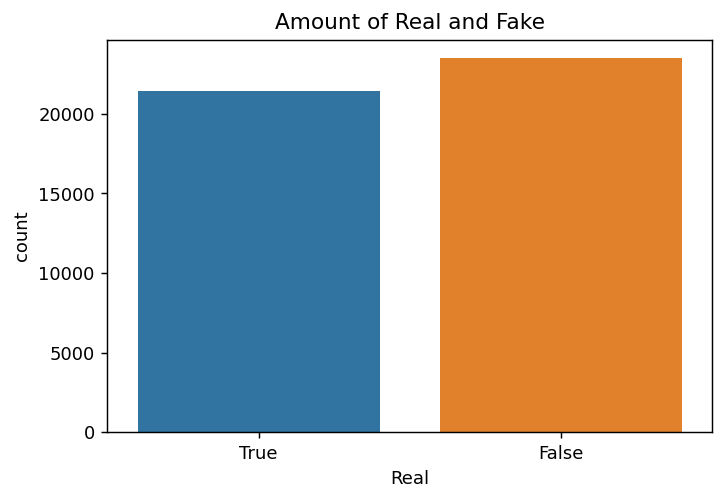

In [160]:
#Countplot for total amount of real news and fake news articles in the data.
sns.countplot(x = 'Real', data = df)
plt.title('Amount of Real and Fake')

In [161]:
df['subject'].value_counts()

politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64

Text(0.5, 1.0, 'Total Count for Subject')

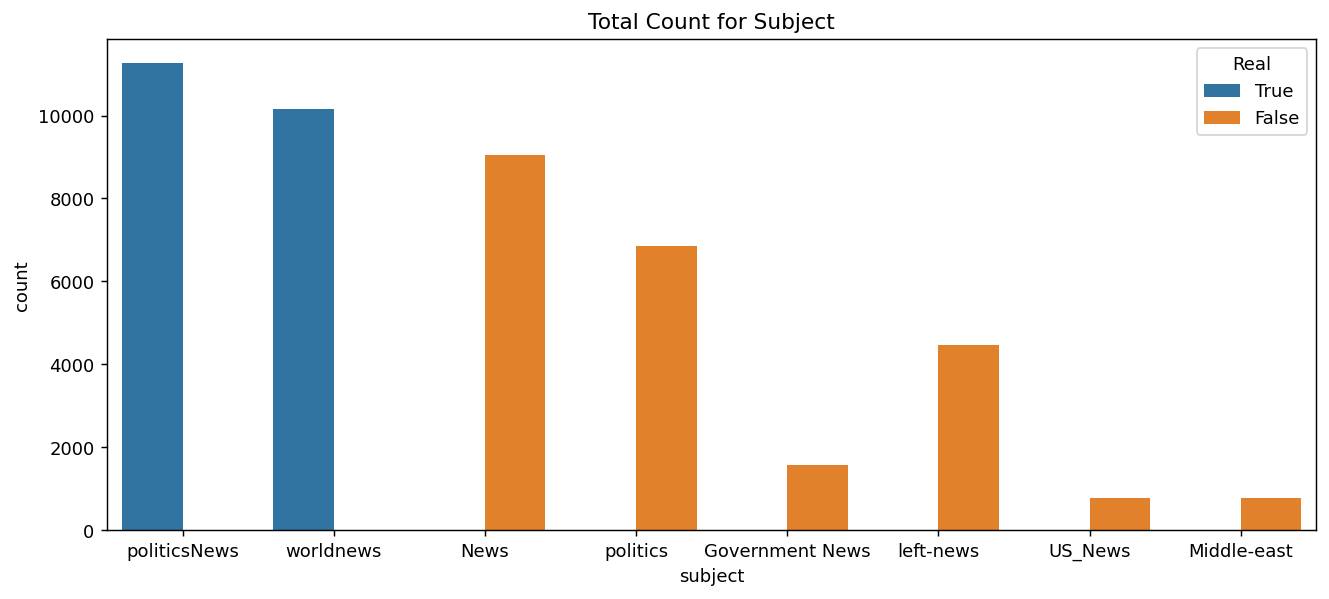

In [162]:
plt.figure(figsize = (12,5))
sns.countplot(x = 'subject', data = df, hue = 'Real')
plt.title('Total Count for Subject')

**Stemming**, also called suffix stripping, is a technique used to reduce text dimensionality. Stemming is also a type of text normalization that enables you to standardize some words into specific expressions also called stems.

**Porter’s Stemmer** - An algorithm for suffix stripping (https://www.cs.toronto.edu/~frank/csc2501/Readings/R2_Porter/Porter-1980.pdf)

cats -> cat






Each C is considered a string with one or more consonants. Each V is considered a string with one or more vowels. Vowels are considered the letters a, e, i, o ,u and y with certain restrictions.

The m is one of the most important concepts in Porter’s stemmer because it defines the threshold for apllying certain rules to a specific word. Let’s see some examples of words:

Tree -> This word can be represented by the representation CV because TR is considered a C representation and EE is considered a V representation. The m in this case is zero because this word only fits into the format [C][V]

Creating -> This word can be represented by CVCVC. To fit the Porter formula you can represent this by [C][VC]², hence m is equal to 2.

Oats -> This word can be represented by VC that fits into Porter Formula as[VC]¹. In this case m is equal to 1.

In [226]:
from nltk.stem import PorterStemmer
porter = PorterStemmer()
porter.stem('cats')

'cat'

In [227]:
porter.stem('Creating')

'creat'

In [228]:
print(porter.stem('amazement'))
print(porter.stem('amaze'))
print(porter.stem('amazed'))
print(porter.stem('amazon'))

amaz
amaz
amaz
amazon


In [238]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
#used for performing lemmatization
from nltk.stem import WordNetLemmatizer 
#used to remove repeating words like- of,we,the,them etc
from nltk.corpus import stopwords  
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/romankyslyi/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/romankyslyi/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [241]:
print(lemmatizer.lemmatize('dogs'))
print(lemmatizer.lemmatize('feet'))
print(lemmatizer.lemmatize('amazed'))
print(lemmatizer.lemmatize('amazon'))
print(lemmatizer.lemmatize('amazement'))

dog
foot
amazed
amazon
amazement


In [164]:
#Removes the punctuation from the real_df data frame.
real_df['text'] = real_df['text'].apply(lambda x: re.sub(r'[^\w\s]','',x))
#Removes the numerals from the real_df data frame.
real_df['text'] = real_df['text'].str.replace('\d+','')
#Removes the quotation marks from the real_df data frame.
real_df['text'] = real_df['text'].apply(lambda x: re.sub(r'\"', '', x))
#Lower case for all text.
real_df['text'] = real_df['text'].str.lower()

/var/folders/s9/dgp650sd0257_t8577rl9_f80000gn/T/ipykernel_9465/1066311846.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  real_df['text'] = real_df['text'].str.replace('\d+','')


In [165]:
#Removes the punctuation (- , .) from the fake_df data frame.
fake_df['text'] = fake_df['text'].apply(lambda x: re.sub(r'[^\w\s]','',x))
#Removes the numerals from the fake_df data frame.
fake_df['text'] = fake_df['text'].str.replace('\d+','')
#Removes the quotation marks from the fake_df data frame.
fake_df['text'] = fake_df['text'].apply(lambda x: re.sub(r'\"', '', x))
#Lower case for all text.
fake_df['text'] = fake_df['text'].str.lower()

/var/folders/s9/dgp650sd0257_t8577rl9_f80000gn/T/ipykernel_9465/3959611516.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  fake_df['text'] = fake_df['text'].str.replace('\d+','')


In [166]:
real_df['text'][0]

'washington reuters  the head of a conservative republican faction in the us congress who voted this month for a huge expansion of the national debt to pay for tax cuts called himself a fiscal conservative on sunday and urged budget restraint in  in keeping with a sharp pivot under way among republicans us representative mark meadows speaking on cbs face the nation drew a hard line on federal spending which lawmakers are bracing to do battle over in january when they return from the holidays on wednesday lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues such as immigration policy even as the november congressional election campaigns approach in which republicans will seek to keep control of congress president donald trump and his republicans want a big budget increase in military spending while democrats also want proportional increases for nondefense discretionary spending on programs that support education scientific research infrastr

In [168]:
#Creates a tokenizer for the text in the real_df data frame.
stop = set([w.lower() for w in nltk.corpus.stopwords.words('english')])
real_tokens = [w.lower() for c in real_df['text'] 
                    for s in nltk.sent_tokenize(c)
                    for w in nltk.word_tokenize(s)
                    if w.isalpha() and w not in stop]
#Creates the bigrams for the real_df data frame based on the tokenizer above.
real_bigrams = nltk.FreqDist(nltk.bigrams(real_tokens))

In [169]:
real_bigrams

FreqDist({('united', 'states'): 12188, ('white', 'house'): 8292, ('donald', 'trump'): 7974, ('washington', 'reuters'): 6492, ('president', 'donald'): 5929, ('north', 'korea'): 5284, ('new', 'york'): 4336, ('prime', 'minister'): 4118, ('said', 'statement'): 3926, ('reuters', 'us'): 3655, ...})

In [170]:
real_top = [((w1,w2),f) for ((w1,w2),f) in real_bigrams.most_common()]

In [171]:
#real_top
real_top[:10]

[(('united', 'states'), 12188),
 (('white', 'house'), 8292),
 (('donald', 'trump'), 7974),
 (('washington', 'reuters'), 6492),
 (('president', 'donald'), 5929),
 (('north', 'korea'), 5284),
 (('new', 'york'), 4336),
 (('prime', 'minister'), 4118),
 (('said', 'statement'), 3926),
 (('reuters', 'us'), 3655)]

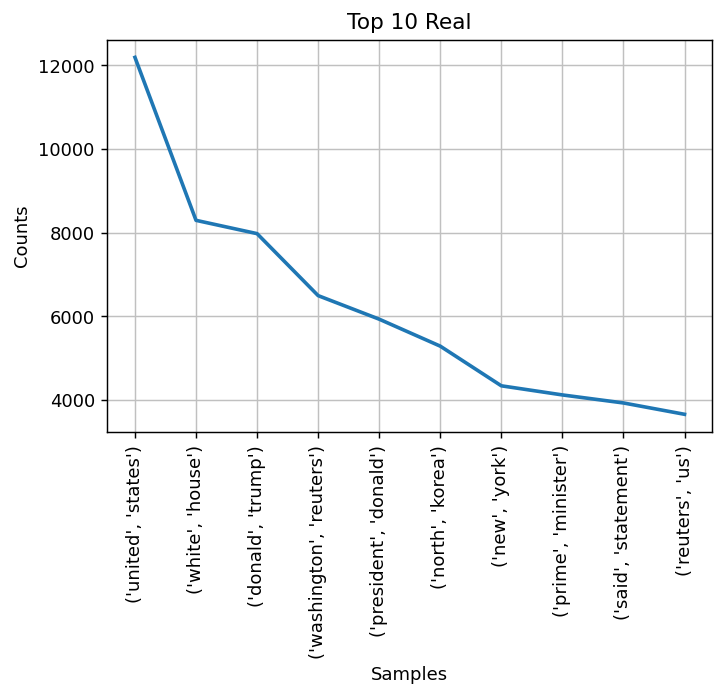

<AxesSubplot:title={'center':'Top 10 Real'}, xlabel='Samples', ylabel='Counts'>

In [172]:
real_bigrams.plot(10, title = 'Top 10 Real')

In [173]:
fake_tokens = [w.lower() for c in fake_df['text'] 
                    for s in nltk.sent_tokenize(c)
                    for w in nltk.word_tokenize(s)
                    if w.isalpha() and w not in stop]
#Creates the bigrams for the real_df data frame based on the tokenizer above.
fake_bigrams = nltk.FreqDist(nltk.bigrams(fake_tokens))

In [174]:
fake_top = [((w1,w2),f) for ((w1,w2),f) in fake_bigrams.most_common()]

In [175]:
fake_top[:10]

[(('donald', 'trump'), 13182),
 (('hillary', 'clinton'), 6704),
 (('white', 'house'), 6293),
 (('image', 'via'), 6192),
 (('united', 'states'), 6169),
 (('new', 'york'), 4189),
 (('president', 'obama'), 3811),
 (('president', 'trump'), 3662),
 (('fox', 'news'), 3222),
 (('st', 'century'), 2229)]

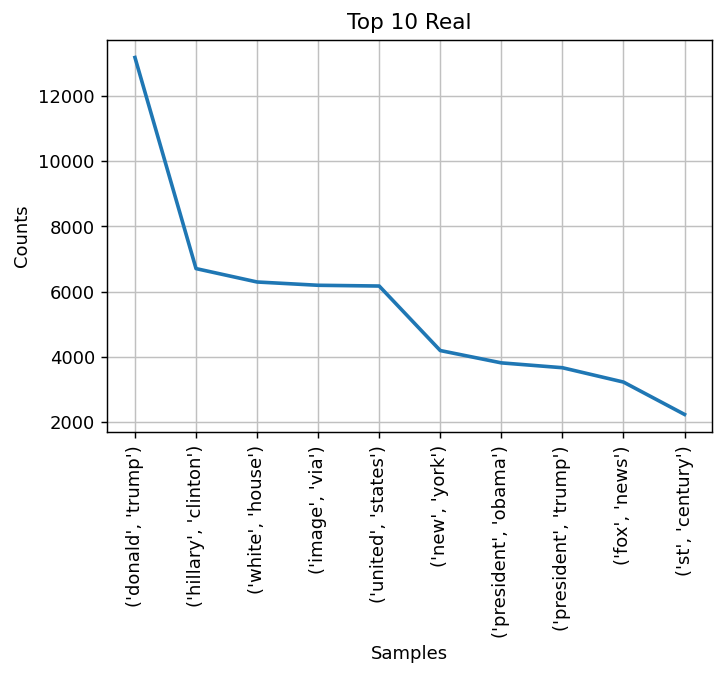

<AxesSubplot:title={'center':'Top 10 Real'}, xlabel='Samples', ylabel='Counts'>

In [176]:
fake_bigrams.plot(10, title = 'Top 10 Real')

In [177]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [178]:
df['Real'] = df['Real'].map({'True':0, 'False':1})
X = df['text'].values
y = df['Real'].values
vector = CountVectorizer(stop_words = 'english')
#Fits/transforms the count vectorizor on the X variable
X = vector.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 30)

In [179]:
bayes_pred = MultinomialNB()
bayes_pred.fit(X_train, y_train)
#Creates predictions based on the model
predictions = bayes_pred.predict(X_test)

In [200]:
t = vector.transform(["Meta says it will restore Donald Trump's Facebook and Instagram accounts within weeks"])

In [201]:
p = bayes_pred.predict_proba(t)

In [202]:
p

array([[0.09145991, 0.90854009]])

In [203]:
bayes_pred.classes_

array([0, 1])

In [91]:
print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test, predictions))

[[5112  248]
 [ 298 5567]]


              precision    recall  f1-score   support

           0       0.94      0.95      0.95      5360
           1       0.96      0.95      0.95      5865

    accuracy                           0.95     11225
   macro avg       0.95      0.95      0.95     11225
weighted avg       0.95      0.95      0.95     11225



/Users/romankyslyi/miniforge3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


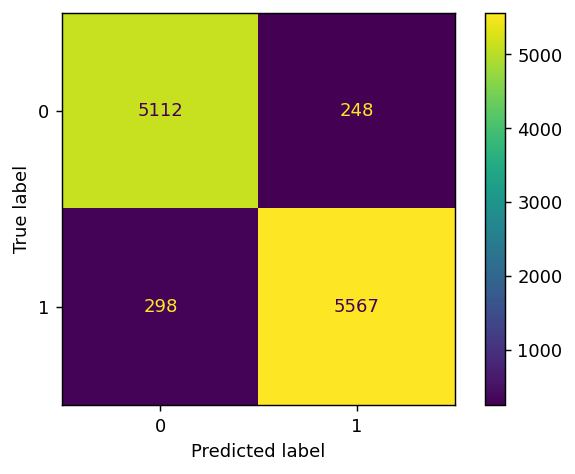

In [94]:
plot_confusion_matrix(bayes_pred, X_test, y_test)

## Saving the model

In [205]:
name = 'bayes_model.pkl'
pickle.dump(bayes_pred, open(name, 'wb'))

In [206]:
loaded_model = pickle.load(open(name, 'rb'))

In [207]:
p = loaded_model.predict_proba(t)

In [208]:
p

array([[0.09145991, 0.90854009]])

# Flask

- simple coding
- easy to do
- very quick

# API

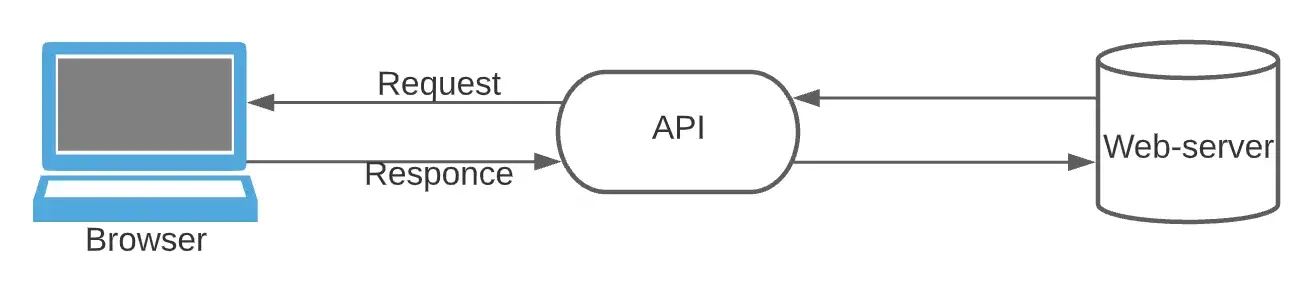

- GET — requests a representation of the specified resource. Requests using GET should only retrieve data.
- POST — submits data to the specified resource.
- PUT — replaces all current representations of the target resource with the request data.
- DELETE — deletes the specified resource.
- PATCH — applies partial modifications to a resource.

- API have to be separated from the backend, data storage, client etc. It has to be separate layer due to security and flexibility.
- State less — different request should know nothing about each other and be processed independently.
- API should work same way independently of a client sending request 

# Docker

Containers provide a way of creating an isolated environment, sometimes called a sandbox, in which applications and their dependencies can live.

- Portability
- Consistency
- Speed to deploy

- **Images**: The blueprints of our application which form the basis of containers. These contain all of the configuration settings that define the isolated environment.
- **Containers**: Are instances of a Docker image and are what run the actual application.
- **Docker Daemon**: That background service running on the host that listens to API calls (via the Docker client), manages images and building, running and distributing containers. The Deamon is the process that runs in the operating system which the client talks to – playing the role of the broker.

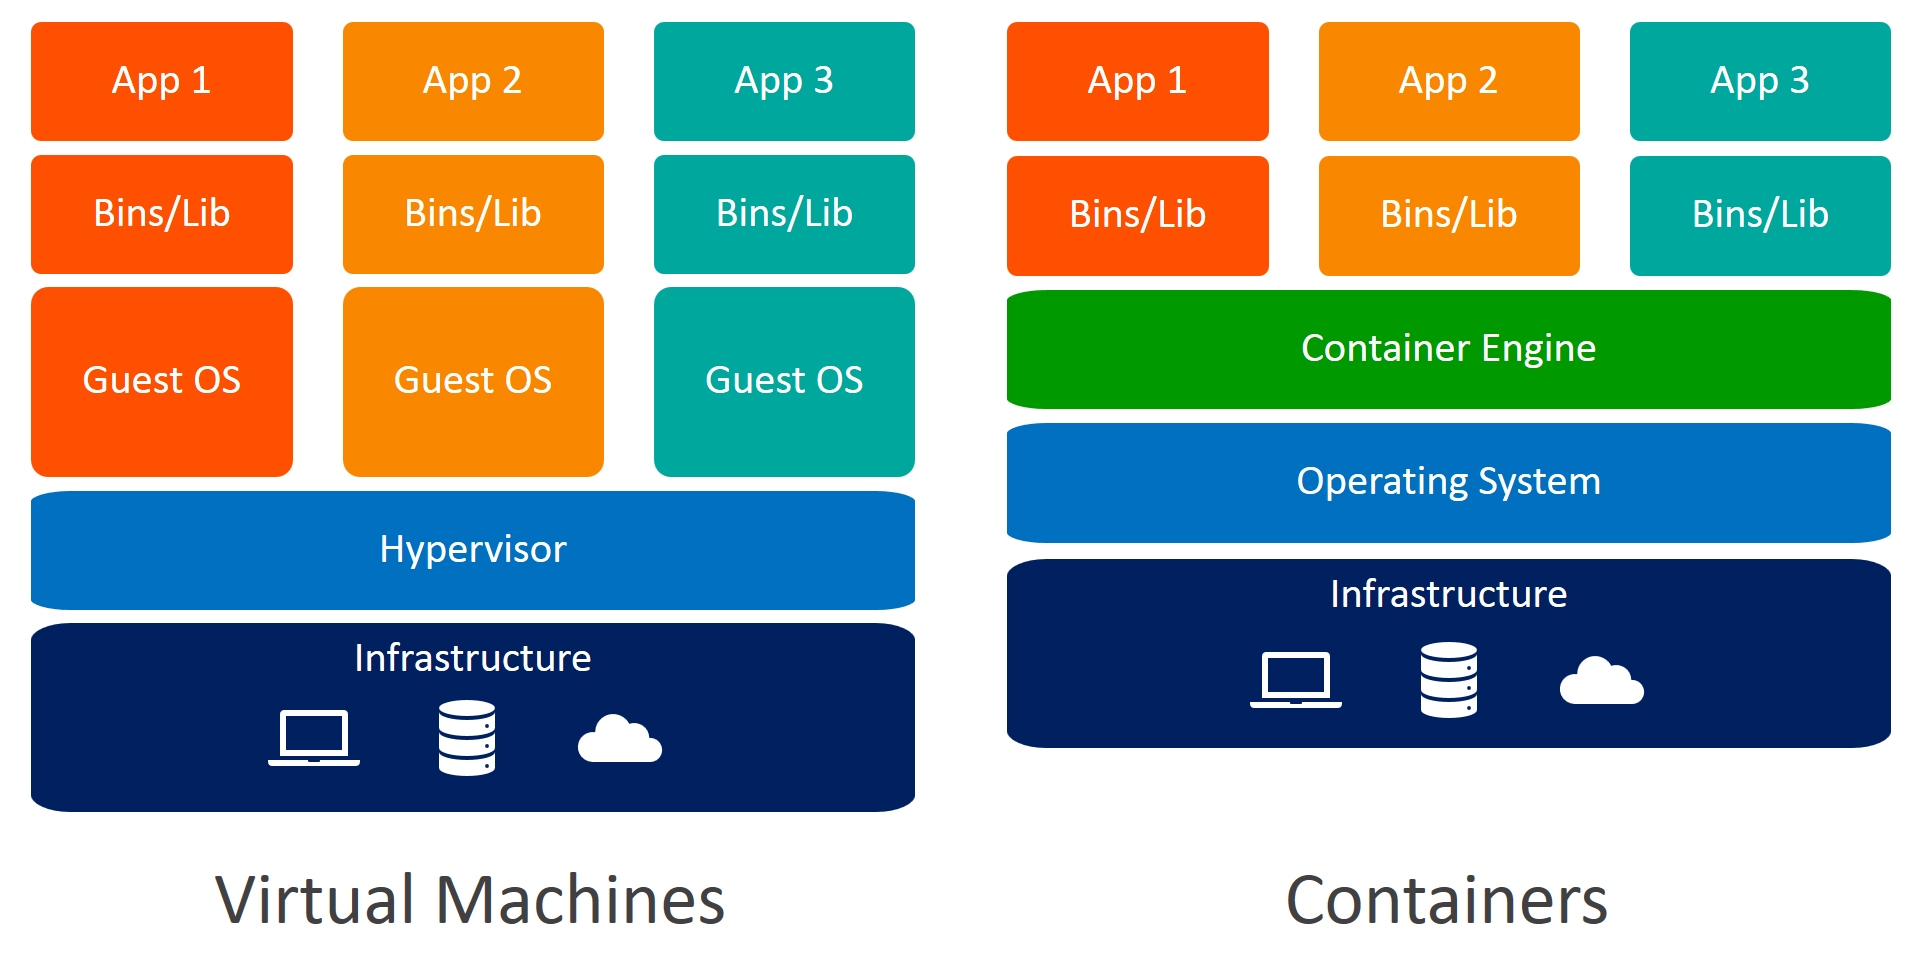

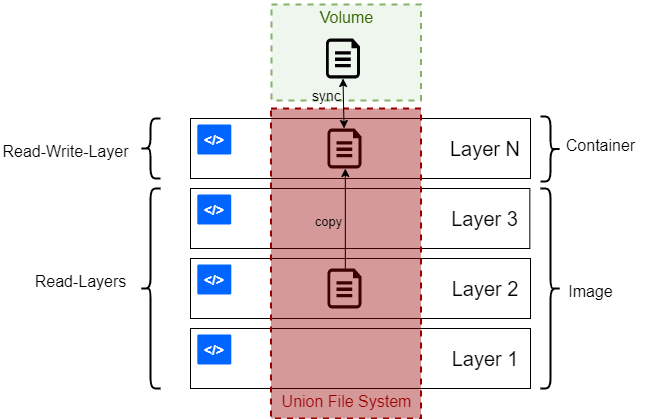

# Task:
- use same dataset and train the classification model
- create flask app with usage of the trained model
- create endpoint which takes text and returns class prediction (or probability)
- (bonus task) use docker

estimated time - 30 min

# Resourses

- https://medium.com/gitconnected/good-api-design-bad-api-design-2405dcdde24c
- https://www.snorkel.org/
- https://github.com/twintproject/twint
- https://towardsdatascience.com/nlp-part-3-exploratory-data-analysis-of-text-data-1caa8ab3f79dvv
- https://docker-curriculum.com/

# Homework
- parse https://rusdisinfo.voxukraine.org/
- write function to parse news pages (choose your own media or try to make general one)
- wrap it in the flask app, so when you pass the URL, you receive list of news back
- wrap it in the docker container

bonus: 
- save obtained news to db
- use docker-compose